In [1]:
import numpy as np
import matplotlib.pyplot as plt
from calculator import Calculator,Methods
from const import Const

In [2]:
cal=Calculator()
cal.read_excel('Data2.xlsx')
order=3
m=cal.M_p[order]
ST=cal.ST[order]
L_s=cal.L_init[order]

In [3]:
cal.me.cal_ML_simple_B(ST,L_s,True,0.0,-100)
rcb=cal.me.RCB_index
c_P,c_T,c_M=cal.me.con.c_P,cal.me.con.c_T,cal.me.con.c_M
r,P,T,M,L=cal.me.r,cal.me.P,cal.me.T,cal.me.M,cal.me.L
G=cal.me.g
dG=cal.me.dg
dP=c_P*M*P/(T*r**2)
dT=np.ones(len(dP))
for i in range(len(dT)):
    dT[i]=min(c_T*1e24*abs(L[i])*P[i]**2*T[i]**(-3)/M[i],cal.me.con.g_ad)*(T[i]*dP[i]/P[i])
dsigma=(-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2)*dT
ddG=6*G/r**2+((-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2)*dT)*dG-(r>cal.me.con.depth)*2*cal.me.con.M_v*(1/r-cal.me.con.depth**2/r**3)/cal.me.con.c**2/cal.me.con.R_B

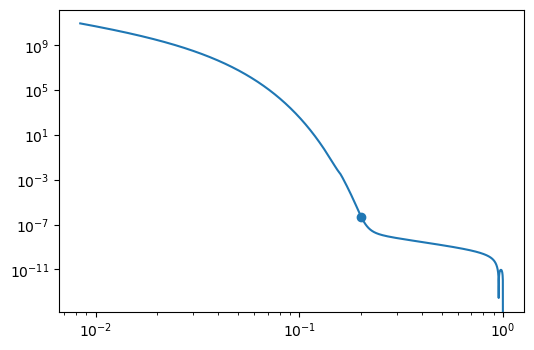

In [4]:
fig=plt.figure(dpi=100)
plt.loglog(r,abs(G)/r/cal.me.con.R_B)
plt.scatter(r[rcb],abs(G[rcb])/r[rcb]/cal.me.con.R_B,marker='o')
plt.show()

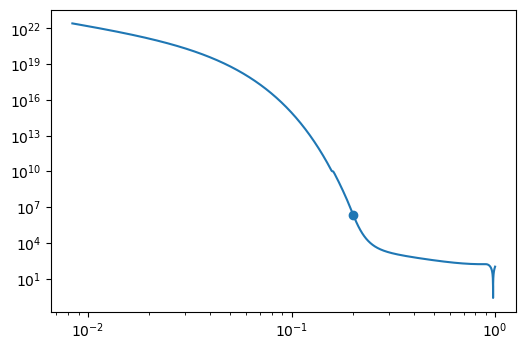

In [5]:
fig=plt.figure(dpi=100)
plt.loglog(r,abs(dG))
plt.scatter(r[rcb],abs(dG[rcb]),marker='o')
plt.show()

In [6]:
len(cal.me.test_values)

2155

In [7]:
dG[0:20]

array([-100.        ,  -99.02742097,  -98.05639608,  -97.08692657,
        -96.1190137 ,  -95.15265871,  -94.18786288,  -93.22462744,
        -92.26295366,  -91.30284281,  -90.34429614,  -89.38731491,
        -88.4319004 ,  -87.47805387,  -86.52577658,  -85.57506981,
        -84.62593482,  -83.6783729 ,  -82.73238531,  -81.78797334])

In [5]:
cal.me.test_values

[-13.489527251575904,
 -13.48952730037625,
 -13.489527300376265,
 -13.48952734917663,
 -13.489527349176644,
 -13.489538226404838,
 -13.489538226404855,
 -13.48954910409517,
 -13.489549104095206,
 -13.489559982247666,
 -13.489559982247702,
 -13.489668789196278,
 -13.48966878919769,
 -13.489612212004708,
 -13.489612212005031,
 -13.489570427346893,
 -13.489570427346907,
 -13.489580872872232,
 -13.489580872872219,
 -13.489591318823663,
 -13.489591318823663,
 -13.489601765201286,
 -13.489601765201286,
 -13.489622659235128,
 -13.489622659235128,
 -13.489643554973943,
 -13.489643554973943,
 -13.489664452417951,
 -13.489664452417951,
 -13.489685351567347,
 -13.489706252422362,
 -13.489915354827039,
 -13.489915354827039,
 -13.490124628023372,
 -13.490124628023372,
 -13.490334072221579,
 -13.49033407222158,
 -13.490543687632256,
 -13.490543687632258,
 -13.49075347446628,
 -13.490753474466281,
 -13.491842558747331,
 -13.491842558747619,
 -13.492936274826084,
 -13.492936274826633,
 -13.49403465242

In [4]:
result=[(np.log(cal.me.sigma(P[i],T[i]))-np.log(cal.me.sigma(P[i-1],T[i-1])))/(r[1]-r[0]) for i in range(1,len(P))]

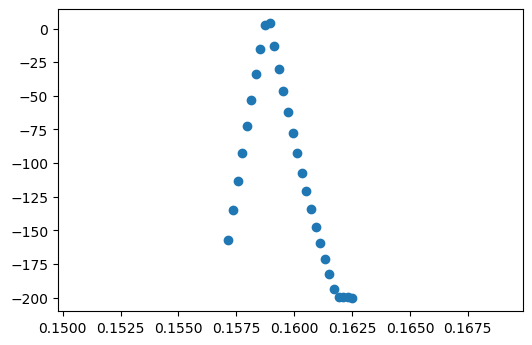

In [20]:
fig=plt.figure(dpi=100)
plt.scatter(r[4222:4250],result[4221:4249])
plt.show()

In [12]:
for i in range(len(r)):
    if 0.1<r[i]<0.2:
        print(result[i-1],i)

-212.83827345942942 4034
-212.76807654528704 4035
-212.69790236908847 4036
-212.62775088779551 4037
-212.5576220576177 4038
-212.48751583540934 4039
-212.41743217734862 4040
-212.347371039569 4041
-212.27733237866505 4042
-212.20731615033145 4043
-212.13732231097023 4044
-212.06735081609247 4045
-211.9974016219211 4046
-211.9274746838508 4047
-211.8575699578269 4048
-211.78768739915003 4049
-211.71782696326852 4050
-211.64798860578298 4051
-211.57817228157313 4052
-211.5083779461366 4053
-211.43860555420974 4054
-211.36885506107532 4055
-211.29912642130856 4056
-211.2294195896414 4057
-211.15973452111473 4058
-211.0900711697486 4059
-211.02042949047643 4060
-210.9508094371884 4061
-210.88121096455825 4062
-210.81163402628812 4063
-210.74207857678303 4064
-210.6725445698392 4065
-210.60303195899303 4066
-210.5335406984616 4067
-210.4640707413604 4068
-210.39462204166023 4069
-210.32519455227515 4070
-210.25578822693862 4071
-210.18640301837667 4072
-210.1170388797675 4073
-210.047695764

In [18]:
for i in range(4222,4250):
    print(P[i],T[i],(np.log(cal.me.sigma(P[i],T[i]))-np.log(cal.me.sigma(P[i-1],T[i-1])))/(r[1]-r[0]))

101.43709510830492 1.5323222417999214 -199.9879411838454
101.92016459536633 1.5344036515816109 -199.92112407179542
102.40605566310587 1.536490122402496 -199.854319155781
102.89478803091522 1.538581143570247 -199.7340095850055
103.38638885819432 1.5406159104401231 -193.47959771682946
103.88090789342306 1.5425488365538216 -182.68473903545657
104.3784013534152 1.5443740701812445 -171.3796791518339
104.87892822493475 1.546085692350655 -159.55824104348588
105.38255035779832 1.547677743297707 -147.21616534192734
105.88933255398842 1.54914425132166 -134.35127151535423
106.39934265202419 1.5504792638359888 -120.96360199393504
106.91265160590522 1.5516768803155674 -107.05554289597968
107.42933355796787 1.5527312867679217 -92.63191612332011
107.94946590509598 1.5536367912816873 -77.70003760597353
108.47312935781378 1.554387860132606 -62.269736517613595
109.00040799191093 1.5549791538604214 -46.35333064691084
109.53138929241076 1.5554055626784928 -29.96555431587281
110.06616418984082 1.5556622405

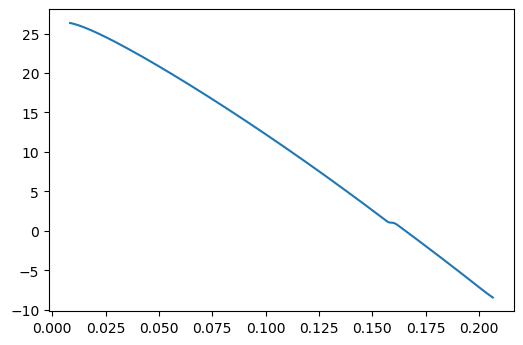

In [25]:
fig=plt.figure(dpi=100)
plt.plot(r[4000:5000],np.log(cal.me.sigma(P,T))[4000:5000])
plt.show()